# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Data collection

In [ ]:
df = pd.read_csv('thyroid_dataset.csv')


In [ ]:
#print top 5 rows in the dataframe
df.head()

,age,gender,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
#print last 5 rows in the dataframe
df.tail()

,age,gender,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [ ]:
df.shape

(3772, 30)

In [ ]:
df.dtypes

age                          object
gender                       object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   gender                     3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# checking for null values

In [ ]:
df.isnull().sum()

age                          0
gender                       0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
df.isna().any()

age                          False
gender                       False
on thyroxine                 False
query on thyroxine           False
on antithyroid medication    False
sick                         False
pregnant                     False
thyroid surgery              False
I131 treatment               False
query hypothyroid            False
query hyperthyroid           False
lithium                      False
goitre                       False
tumor                        False
hypopituitary                False
psych                        False
TSH measured                 False
TSH                          False
T3 measured                  False
T3                           False
TT4 measured                 False
TT4                          False
T4U measured                 False
T4U                          False
FTI measured                 False
FTI                          False
TBG measured                 False
TBG                          False
referral source     

# Data Preprocessing

Age

In [ ]:
df.columns

Index(['age', 'gender', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
df['age'].describe()

count     3772
unique      94
top         59
freq        95
Name: age, dtype: object

In [ ]:
df['age'].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

In [ ]:
df[df['age']=='?']

,age,gender,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
1985,?,F,t,f,f,f,f,f,t,f,...,t,120,t,0.82,t,146,f,?,other,P


In [ ]:
df[(df['gender']=='F') & (df['age']!='?')][['age']].mode()

,age
0,70


In [ ]:
df.iloc[1985,:]['age'] = 70

# gender

In [ ]:
df['gender'].dtypes

dtype('O')

In [ ]:
df['gender'].unique()

array(['F', 'M', '?'], dtype=object)

In [ ]:
df['gender'].value_counts()

F    2480
M    1142
?     150
Name: gender, dtype: int64

In [ ]:
df = df[df['gender']!='?']

In [ ]:
df.shape

(3622, 30)

# on thyroxine

In [ ]:
df['on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [ ]:
df['on thyroxine'].value_counts()

f    3173
t     449
Name: on thyroxine, dtype: int64

# query on thyroxine

In [ ]:
df['query on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [ ]:
df['query on thyroxine'].value_counts()

f    3573
t      49
Name: query on thyroxine, dtype: int64

# on antithyroid medication

In [ ]:
df['on antithyroid medication'].unique()

array(['f', 't'], dtype=object)

In [ ]:
df['on antithyroid medication'].value_counts()

f    3579
t      43
Name: on antithyroid medication, dtype: int64

#  sick


In [ ]:
df['sick'].value_counts()

f    3479
t     143
Name: sick, dtype: int64

In [ ]:
df['pregnant'].value_counts()

f    3571
t      51
Name: pregnant, dtype: int64

In [ ]:
columns = ['sick','pregnant','thyroid surgery','I131 treatment','query hypothyroid','query hyperthyroid','lithium','goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source']

In [ ]:
for i in columns:
    print(i)
    print(df[i].value_counts())
    print(" ")

sick
f    3479
t     143
Name: sick, dtype: int64
 
pregnant
f    3571
t      51
Name: pregnant, dtype: int64
 
thyroid surgery
f    3570
t      52
Name: thyroid surgery, dtype: int64
 
I131 treatment
f    3567
t      55
Name: I131 treatment, dtype: int64
 
query hypothyroid
f    3393
t     229
Name: query hypothyroid, dtype: int64
 
query hyperthyroid
f    3393
t     229
Name: query hyperthyroid, dtype: int64
 
lithium
f    3604
t      18
Name: lithium, dtype: int64
 
goitre
f    3588
t      34
Name: goitre, dtype: int64
 
tumor
f    3528
t      94
Name: tumor, dtype: int64
 
hypopituitary
f    3621
t       1
Name: hypopituitary, dtype: int64
 
psych
f    3443
t     179
Name: psych, dtype: int64
 
TSH measured
t    3270
f     352
Name: TSH measured, dtype: int64
 
T3 measured
t    2877
f     745
Name: T3 measured, dtype: int64
 
TT4 measured
t    3405
f     217
Name: TT4 measured, dtype: int64
 
TT4 measured
t    3405
f     217
Name: TT4 measured, dtype: int64
 
T4U measured
t    3255

In [ ]:
df.columns

Index(['age', 'gender', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
col = ['T3','TT4','T4U','FTI','TBG','TSH']

In [ ]:
for i in col:
    print(i)
    print(df[i].unique())
    print(" ")

T3
['2.5' '2' '?' '1.9' '1.2' '0.6' '2.2' '1.6' '3.8' '1.7' '1.8' '2.6' '2.1'
 '0.3' '5.5' '1.4' '3.1' '1.5' '2.3' '2.4' '2.7' '0.9' '1' '2.8' '2.9'
 '0.8' '1.3' '0.4' '3.5' '3.4' '1.1' '4.2' '3.7' '3' '0.7' '4.8' '4.3'
 '0.05' '3.2' '5.4' '4' '0.5' '0.2' '3.6' '3.3' '5.2' '6' '5' '5.3' '3.9'
 '4.6' '4.5' '7.3' '4.7' '6.7' '4.1' '6.1' '0.1' '4.9' '10.6' '5.1' '7'
 '6.2' '4.4' '7.1' '8.5' '1.44' '7.6' '5.7' '6.6']
 
TT4
['125' '102' '109' '175' '61' '183' '72' '80' '123' '83' '115' '152' '171'
 '97' '99' '117' '121' '130' '108' '104' '134' '199' '57' '129' '113'
 '119' '84' '81' '95' '66' '101' '147' '120' '69' '?' '39' '87' '63' '133'
 '86' '162' '103' '96' '151' '112' '82' '71' '77' '107' '110' '67' '160'
 '118' '136' '114' '116' '161' '11' '32' '124' '137' '135' '105' '150'
 '126' '146' '91' '70' '217' '93' '141' '159' '122' '100' '111' '140'
 '205' '225' '85' '90' '74' '219' '127' '132' '128' '106' '144' '131' '56'
 '79' '142' '98' '177' '139' '94' '78' '189' '180' '88' '92' '73' '1

In [ ]:
df = df[(df['TSH']!='?') & (df['FTI']!='?') & (df['T4U']!='?') & (df['TT4']!='?') & (df['T3']!='?')]

In [ ]:
col = ['T3','TT4','T4U','FTI','TSH']

In [ ]:
for i in col:
    df[i] = pd.to_numeric(df[i])

<ipython-input-488-62a2effa985c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_numeric(df[i])


In [ ]:
df.drop('TBG',axis=1,inplace=True)


<ipython-input-489-53064dff6002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('TBG',axis=1,inplace=True)


In [ ]:
df.head()

,age,gender,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P
7,80,F,f,f,f,f,f,f,f,f,...,0.6,t,80.0,t,0.70,t,115.0,f,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,2.2,t,123.0,t,0.93,t,132.0,f,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,1.6,t,83.0,t,0.89,t,93.0,f,SVI,P


In [ ]:
df.drop('T3 measured',axis=1,inplace=True)


<ipython-input-491-d9c4e7e71a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('T3 measured',axis=1,inplace=True)


In [ ]:
df.drop('TBG measured',axis=1,inplace=True)


In [ ]:
df.drop('TT4 measured',axis=1,inplace=True)


In [ ]:
df.drop('FTI measured',axis=1,inplace=True)


In [ ]:
df.drop('T4U measured',axis=1,inplace=True)


In [ ]:
df.drop('TSH measured',axis=1,inplace=True)


In [ ]:
df.drop('query on thyroxine',axis=1,inplace=True)

In [ ]:
df.head()

,age,gender,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P
7,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,P


# Converting Categorical Values to Numerical Values

In [ ]:

df = df.replace("f", 0)
df = df.replace("t", 1)
df = df.replace("F", 0)
df = df.replace("M", 1)
df = df.replace("P", 1)
df = df.replace("N", 0)
df = df.replace("F", 0)
df = df.replace("other",0)
df = df.replace("SVI",1)
df = df.replace("SVHC",2)
df = df.replace("STMW",3)
df = df.replace("SVHD",4)



In [ ]:
df.head()

,age,gender,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,2,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,1,1
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,2.20,0.6,80.0,0.70,115.0,1,1
8,66,0,0,0,0,0,0,0,0,0,...,1,0,0,0.60,2.2,123.0,0.93,132.0,1,1
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,2.40,1.6,83.0,0.89,93.0,1,1


In [ ]:
df['binaryClass'].unique()

array([1, 0])

In [ ]:
df['binaryClass'].value_counts()

1    2263
0     381
Name: binaryClass, dtype: int64

In [ ]:
df.dtypes

age                           object
gender                         int64
on thyroxine                   int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral source                int64
binaryClass                    int64
dtype: object

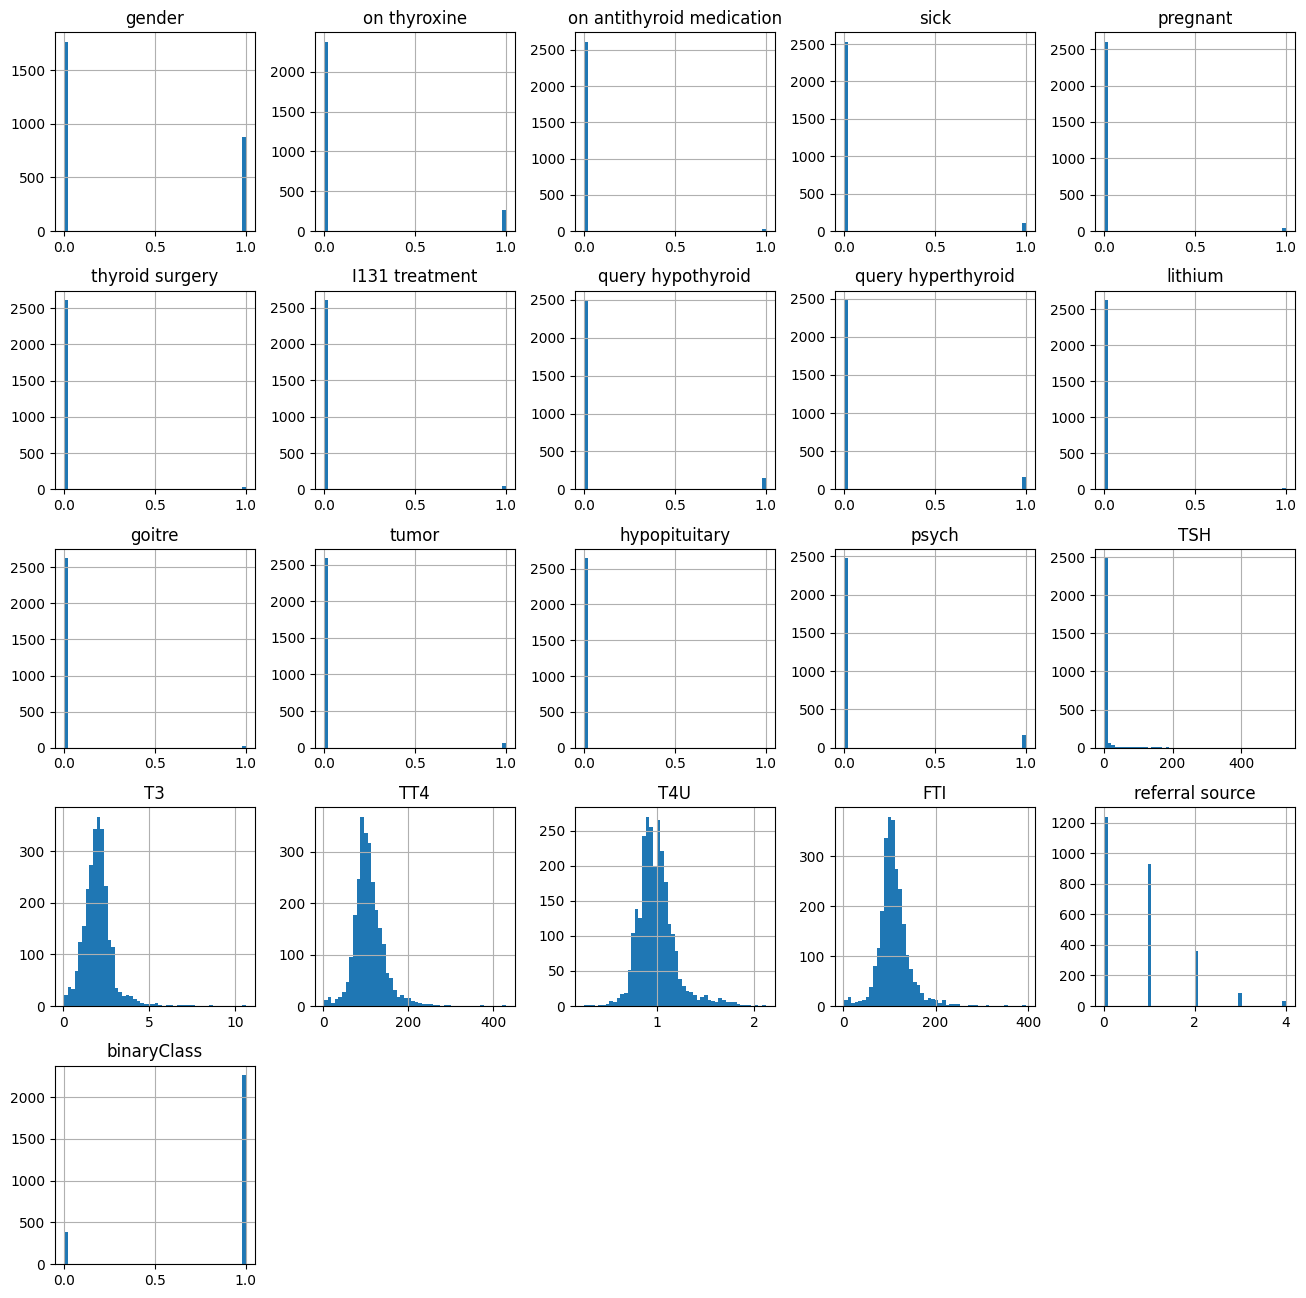

In [ ]:
df.hist(bins = 50,figsize = (16,16))
plt.show()

# Train & Test Split

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2644, 21) (2115, 21) (529, 21)


### Machine Learning Models

In [ ]:
MLModel = []
accuracy = []
precision=[]


#function to call for storing the results
def storeResults(model, a,b):
  MLModel.append(model)
  accuracy.append(round(a, 3))
  precision.append(round(b,3))
  

# support vector machine

In [ ]:

clf=SVC()

clf.fit(x_train.values, y_train.values)


SVC()

In [ ]:
y_pred_test = clf.predict(x_test.values)

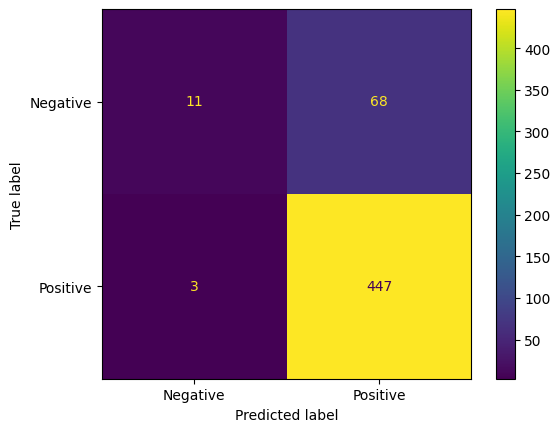

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy score of SVM Algorithm is: ",accuracy_score(y_test,y_pred_test))
print("Precison score of SVM Algorithm is: ",precision_score(y_test,y_pred_test))
storeResults("SVM", accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test))


Accuracy score of SVM Algorithm is:  0.8657844990548205
Precison score of SVM Algorithm is:  0.8679611650485437


## K-Nearest Neighbor

In [ ]:

knn = KNeighborsClassifier()
knn.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [ ]:
y_pred_test = knn.predict(x_test.values)

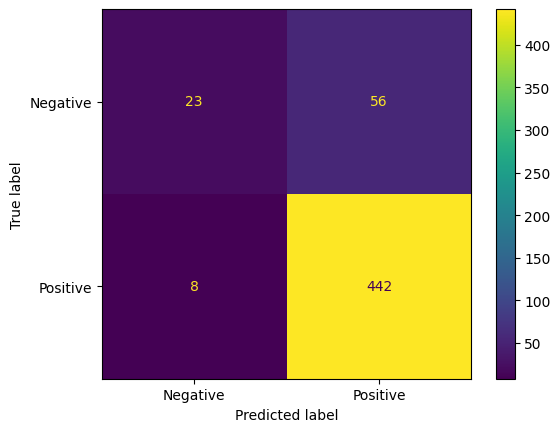

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.show()

In [ ]:

print("Accuracy score of KNN Algorithm is: ",accuracy_score(y_test,y_pred_test))
print("Precison score of KNN Algorithm is: ",precision_score(y_test,y_pred_test))

storeResults("KNN", accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test))

Accuracy score of KNN Algorithm is:  0.8790170132325141
Precison score of KNN Algorithm is:  0.8875502008032129


# Random forest

In [ ]:

model = RandomForestClassifier(n_estimators=40)
model.fit(x_train.values, y_train.values)

RandomForestClassifier(n_estimators=40)

In [ ]:
y_pred_test = model.predict(x_test.values)

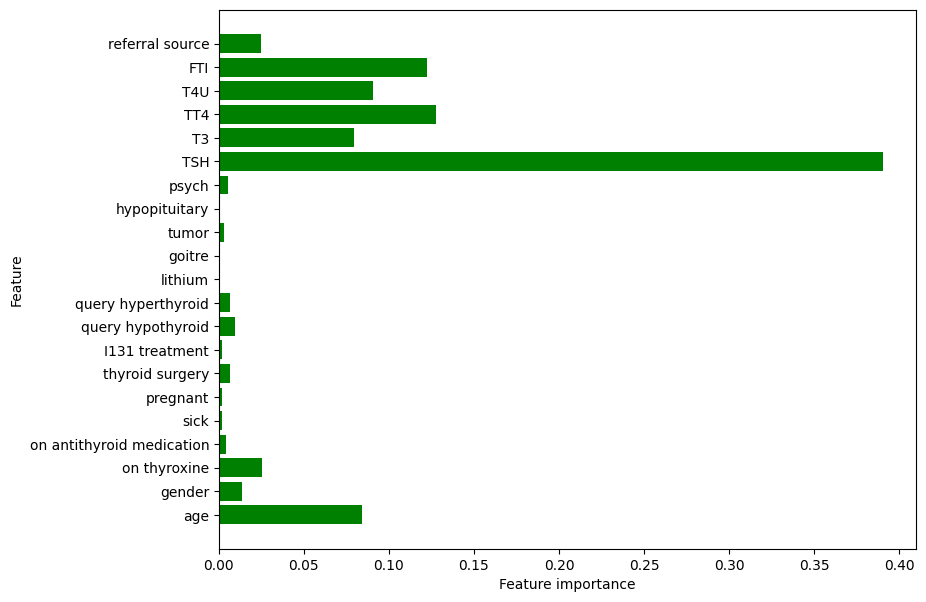

In [ ]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center',color='g')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

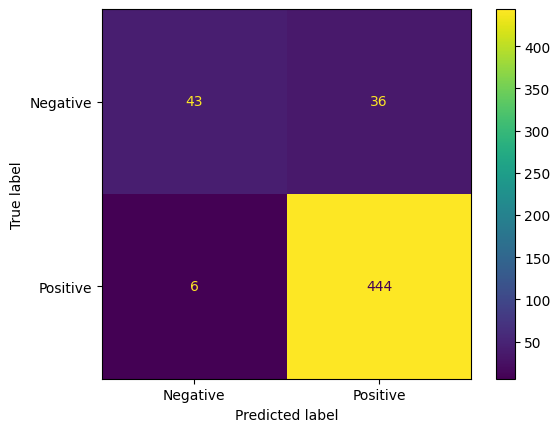

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.show()

In [ ]:

print("Accuracy score of Random Forest Algorithm is: ",accuracy_score(y_test,y_pred_test))
print("Precison score of Random Forest Algorithm is: ",precision_score(y_test,y_pred_test))
storeResults("Random Forest", accuracy_score(y_test,y_pred_test),precision_score(y_test,y_pred_test))


Accuracy score of Random Forest Algorithm is:  0.9206049149338374
Precison score of Random Forest Algorithm is:  0.925


In [ ]:
import pickle



In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

In [ ]:
loaded_model=pickle.load(open('trained_model.sav', 'rb'))


# predictive model

In [ ]:
def predict(input_data):
    kr=np.asarray(input_data)
    input_data_reshaped = kr.reshape(1,-1)
    prediction = loaded_model.predict(input_data_reshaped)
    return prediction


input_data=(41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1)
prediction=predict(input_data)
print(prediction)
if (prediction == 0):
  print('The Person does not have a Thyroid Disease')
else:
  print('The Person has Thyroid Disease')

[1]
The Person has Thyroid Disease


Comparision Of Algorithms

In [ ]:
results = pd.DataFrame({ 'MLModel': MLModel,    
                         'AccuracyScore': accuracy,
                        'PrecisionScore': precision})
results

,MLModel,AccuracyScore,PrecisionScore
0,SVM,0.866,0.868
1,KNN,0.879,0.888
2,Random Forest,0.921,0.925


Text(0, 0.5, 'Score')

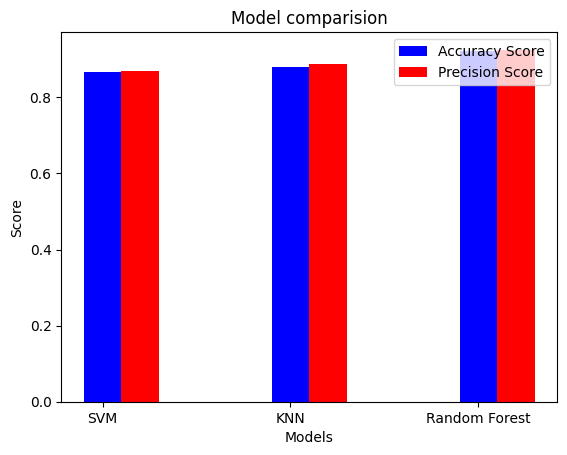

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
fb=(results["AccuracyScore"])
yt=(results["PrecisionScore"])
xp=(results["MLModel"])

bandwidth=0.2
xpls=np.arange(len(fb))
plt.bar(xp,fb,color="blue",width=bandwidth,label="Accuracy Score")
plt.bar(xpls+0.2,yt,color="red",width=bandwidth,label="Precision Score")
plt.legend()
plt.xlabel("Models")
plt.title("Model comparision")
plt.ylabel("Score")